In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

## Generate dataset

In [27]:
import mglearn
X,y=mglearn.datasets.make_forge()

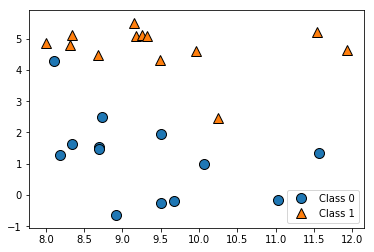

In [28]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0","Class 1"],loc=4)

In [29]:
print("X.shape: {}".format(X.shape))

X.shape: (26, 2)


### Regression Eg

Text(0,0.5,'Target')

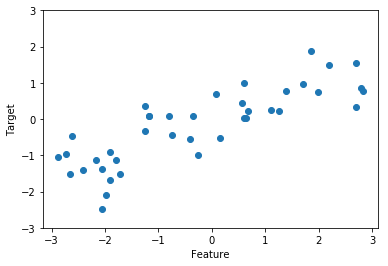

In [30]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [31]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [32]:
print(cancer.data.shape)

(569, 30)


In [33]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [34]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

# K-Nearest Neighbours

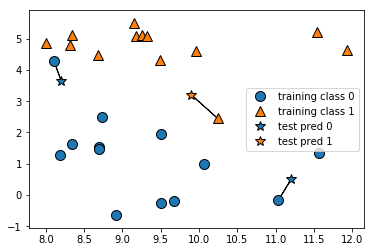

In [35]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

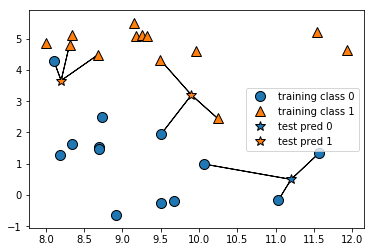

In [36]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [37]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()

In [38]:
X_train,X_Test,y_train,y_test=train_test_split(X,y,random_state=0)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
clf=KNeighborsClassifier(n_neighbors=3)

### fit the classifier using training set 

In [41]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### predict on test data

In [42]:
print("Test set prediction:{}".format(clf.predict(X_Test)))

Test set prediction:[1 0 1 0 1 0 0]


### evalutate model

In [46]:
print("Test set accuracy {:.3f}".format(clf.score(X_Test,y_test)))

Test set accuracy 0.857


### Analyzing model

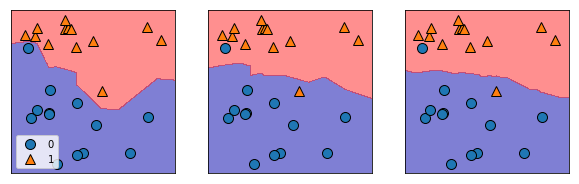

In [64]:
fig,axes=plt.subplots(1,3,figsize=(10,3))
for n_neighbours,ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbours).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.4,ax=ax,alpha=.5)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
axes[0].legend(loc=3)